In [25]:
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# load boxes.npy and masks.npy

In [14]:
boxes = np.load("./root/results/Result2021-12-12_02:27:34_EST-0500/rois/1_488_STED_decon_gamma0.7_boxes.npy",allow_pickle=True)
masks = np.load("./root/results/Result2021-12-12_02:27:34_EST-0500/rois/1_488_STED_decon_gamma0.7_masks.npy",allow_pickle=True)

In [16]:
print("boxes.shape",boxes.shape)
print("masks.shape",masks.shape)
      
print("boxes[0]",boxes[0])

boxes.shape (37, 4)
masks.shape (512, 512, 37)
boxes[0] [127 135 177 180]


# Set save path for segmentation

In [19]:
%pwd

'/Users/alpaca/Desktop/Research/TelescopeCell/Segmentation'

In [22]:
%ls ../../Datasets/210901PictData/

1/ 2/ 3/ 4/


In [28]:
Cell01 = "../../Datasets/210901PictData/Cell01"
Cell02 = "../../Datasets/210901PictData/Cell02"
Cell03 = "../../Datasets/210901PictData/Cell03"
Cell04 = "../../Datasets/210901PictData/Cell04"
if not os.path.exists(Cell01):
    os.makedirs(Cell01)
if not os.path.exists(Cell02):
    os.makedirs(Cell02)
if not os.path.exists(Cell03):
    os.makedirs(Cell03)
if not os.path.exists(Cell04):
    os.makedirs(Cell04)

%ls ../../Datasets/210901PictData/

1/      2/      3/      4/      Cell01/ Cell02/ Cell03/ Cell04/


In [34]:
imgpath = "../../Datasets/210901PictData/1/"
savepath =  "../../Datasets/210901PictData/Cell01/"

# pick each cell of the whole image

## box in 512 ==> 5120

In [32]:
# box in 512 ==> 5120
box_all=[]
for x in range(boxes.shape[0]):
    box_all.append([boxes[x][0]*10, boxes[x][1]*10, (boxes[x][2]+1)*10-1, (boxes[x][3]+1)*10-1])
box_all = np.array(box_all)
print("box_all.shape：", box_all.shape)
print("box[1] before：", boxes[1])      
print("box[1] after：", box_all[1])
print("")

box_all.shape： (37, 4)
box[1] before： [  0 248  22 358]
box[1] after： [   0 2480  229 3589]



For example：
Cut the box from origin image with shape 5120*5120
1_555_STED_decon_gamma6.tif


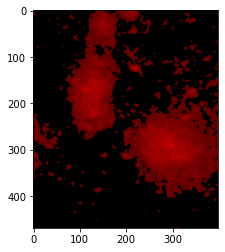

1_555_STED.tif


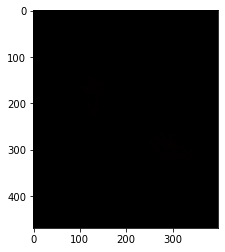

1_555_conf.tif


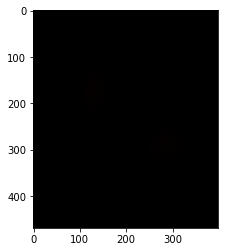

1_488_STED_decon_linear.tif


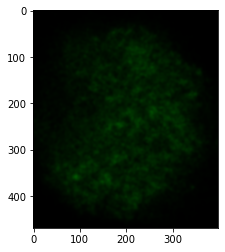

1_488_STED_linear.tif


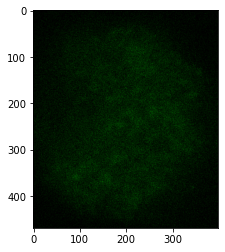

1_999_conf_gamma6.tif


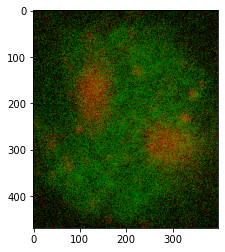

1_488_STED_decon.tif


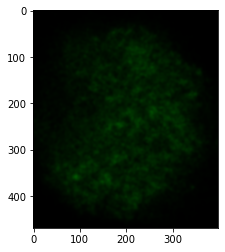

1_555_STED_gamma6.tif


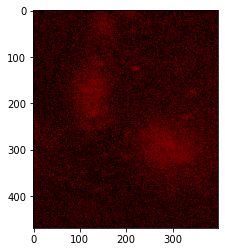

1_999_STED_decon_linear.tif


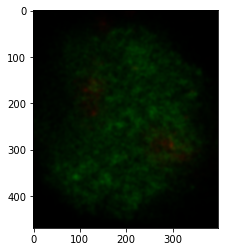

1_999_conf_linear.tif


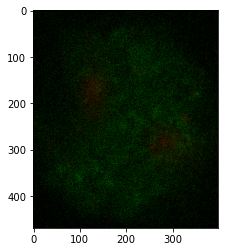

1_999_STED_decon_gamma6.tif


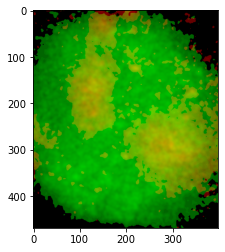

1_555_STED_linear.tif


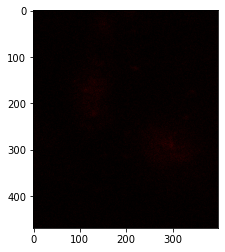

1_555_STED_decon_linear.tif


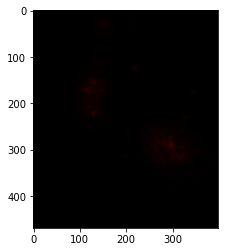

1_488_STED_gamma6.tif


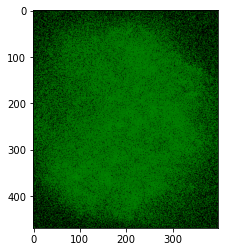

1_488_STED_decon_gamma6.tif


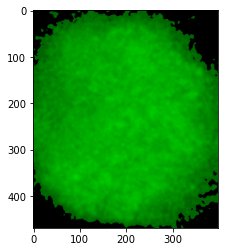

1_999_STED.tif


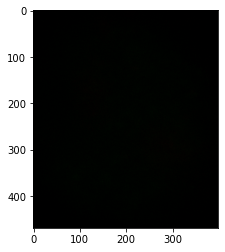

1_999_conf.tif


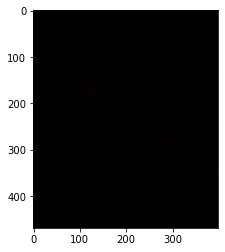

1_555_conf_gamma6.tif


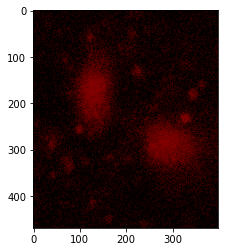

1_999_STED_gamma6.tif


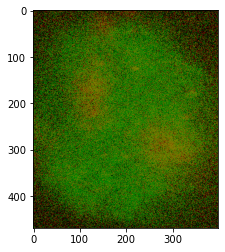

1_488_conf_linear.tif


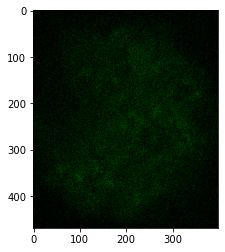

1_999_STED_decon.tif


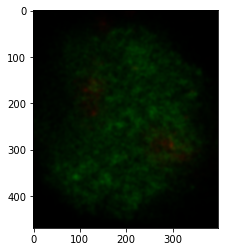

1_488_conf_gamma6.tif


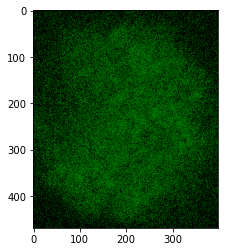

1_488_STED.tif


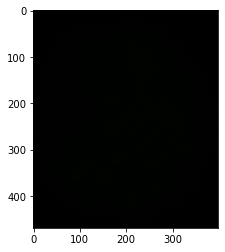

1_488_conf.tif


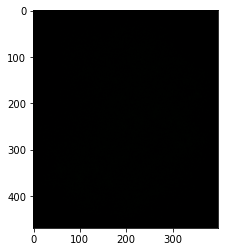

1_555_STED_decon.tif


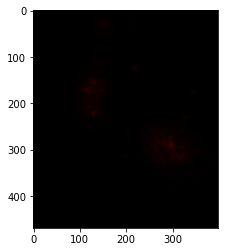

1_555_conf_linear.tif


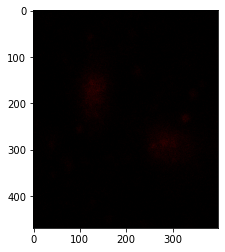

1_999_STED_linear.tif


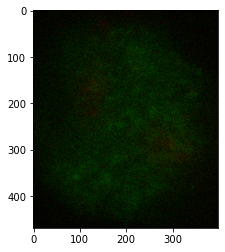

In [37]:
# ** For example **
print("For example：")
print("Cut the box from origin image with shape 5120*5120")

for name in os.listdir(imgpath):
    image_path = os.path.join(imgpath,name)
    print(name)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_box = img[box_all[11][0]:box_all[11][2], box_all[11][1]:box_all[11][3]]
    plt.imshow(img_box)
    plt.show()

## mask 512 * 512 ==>  5120 * 5120

In [38]:
# mask 512*512 ==>  5120*5120
img_mask_all = []
for i in range(masks.shape[2]):
    mask = masks[:,:,i]
    img_mask = np.zeros((5120,5120))
    for x in range(512):
        for y in range(512):
            if mask[x][y] == True:
                for m in range(10*x,10*(x+1)):
                    for n in range(10*y,10*(y+1)):
                        img_mask[m][n]=1
    img_mask_all.append(img_mask)
    
img_mask_all = np.array(img_mask_all)
print("img_mask_all.shape：", img_mask_all.shape)
print("")

img_mask_all.shape： (37, 5120, 5120)



For example：


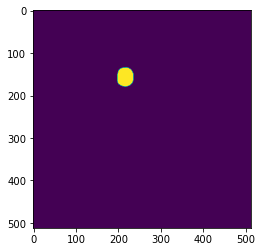

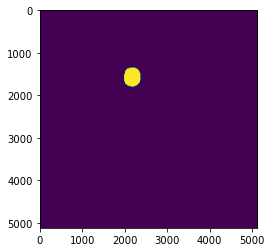

In [39]:
# For example
print("For example：")
# mask 512*512
mask=masks[:,:,11]
img_mask = np.zeros((512,512))
for x in range(512):
    for y in range(512):
        if mask[x][y] == True:
            img_mask[x][y]=1
plt.imshow(img_mask)
plt.show()     

# mask 5120*5120
plt.imshow(img_mask_all[11])
plt.show()

In [ ]:
i=12
pic = img[box_all[i][0]:box_all[i][2], box_all[i][1]:box_all[i][3]]
print("pic.shape",pic.shape)
plt.imshow(pic)
plt.show()

mask = img_mask_all[i,:,:]
mask=mask[box_all[i][0]:box_all[i][2], box_all[i][1]:box_all[i][3]]
print("mask.shape",mask.shape)
plt.imshow(mask)
plt.show()

pic_mask=np.multiply(pic,mask)
plt.imshow(pic_mask)
plt.show()

## remove the pixel that is not in mask

In [ ]:
savepath =  "../../Datasets/210901PictData/DataSegment/1"

%rm -r ../../Datasets/210901PictData/DataSegment/1
if not os.path.exists(savepath):
    os.makedirs(savepath)

In [ ]:
# 1. 512 * 512 ==> 5120 * 5120
# 2. split each boxes
# 3. retain only pixel that mask is true

for name in os.listdir(imgpath):
    image_path = os.path.join(imgpath,name)
    ll=len(name)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    for i in range(box_all.shape[0]):
        pic = img[box_all[i][0]:box_all[i][2], box_all[i][1]:box_all[i][3]]
        mask = img_mask_all[i,:,:]
        mask=mask[box_all[i][0]:box_all[i][2], box_all[i][1]:box_all[i][3]]
        pic_mask=np.multiply(pic,mask)
        plt.imshow(pic_mask)
        plt.show()
        cv2.imwrite(savepath + name[0:ll-4] + "_"+str(i)+'.tif', pic)

In [ ]:
i=11
mask=r['masks'][:,:,i]
box = r['rois']

mask_512 = np.zeros((512,512))
for x in range(512):
    for y in range(512):
        if mask[x][y] == True:
            mask_512[x][y]=1
print("mask_512.shape",mask_512.shape)
plt.imshow(mask_512)
plt.show()


img_mask_512=mask_512[box[i][0]:box[i][2], box[i][1]:box[i][3]]
print("mask.shape",img_mask_512.shape)
plt.imshow(img_mask_512)
plt.show()



mask_5120 = np.zeros((5120,5120))
for x in range(512):
    for y in range(512):
        if mask_512[x][y] == True:
            for m in range(10*x,10*(x+1)):
                for n in range(10*y,10*(y+1)):
                    mask_5120[m][n]=1    
print("img_mask_all.shape：", mask_5120.shape)
plt.imshow(mask_5120)
plt.show()


img_mask_5120=mask_5120[box_all[i][0]:box_all[i][2], box_all[i][1]:box_all[i][3]]
print("img_mask_5120.shape",img_mask_5120.shape)
plt.imshow(img_mask_5120)
plt.show()